In [ ]:
from  matplotlib import pyplot as plt
from IPython.display import Image
from  pprint import pprint
from tqdm import tqdm
import numpy as np
import cv2
import sys
import os
import re

In [ ]:
!tree $VID_DIR/referencyjne

/content/drive/MyDrive/YOLOv4/wideo/referencyjne
├── beauty_1920x1080_120fps_20s.avi
├── beauty_1920x1080_120fps_20s.yuv
├── Beauty_1920x1080_120fps_420_8bit_YUV.yuv
├── beauty_1920x1080_120fps.avi
├── readysetgo_1920x1080_120fps_20s.avi
├── readysetgo_1920x1080_120fps_20s.yuv
├── readysetgo_1920x1080_120fps.avi
└── ReadySteadyGo_1920x1080_120fps_420_8bit_YUV.yuv

0 directories, 8 files


In [ ]:
PROJECT_PATH = '/content/drive/MyDrive/YOLOv4'
VID_DIR = '/content/drive/MyDrive/YOLOv4/wideo'
CLASSES = ('Person',)
CODECS = ('libx264', 'libx265')
BITRATES = ['300k', '400k', '500k', '600k', '700k', '800k', '900k', '1000k', '1500k', '2000k', '3000k'] 

In [ ]:
!apt list -a --installed ffmpeg

Listing... Done
ffmpeg/bionic-updates,bionic-security,now 7:3.4.8-0ubuntu0.2 amd64 [installed]
ffmpeg/bionic 7:3.4.2-2 amd64



In [ ]:
!ffmpeg -s 1920x1080 -r 120 -pix_fmt yuv420p -i $PROJECT_PATH/wideo/referencyjne/Beauty_1920x1080_120fps_420_8bit_YUV.yuv -c:v copy $PROJECT_PATH/wideo/referencyjne/beauty_1920x1080_120fps.avi
!ffmpeg -s 1920x1080 -r 120 -pix_fmt yuv420p -i $PROJECT_PATH/wideo/referencyjne/ReadySteadyGo_1920x1080_120fps_420_8bit_YUV.yuv -c:v copy $PROJECT_PATH/wideo/referencyjne/readysetgo_1920x1080_120fps.avi

In [ ]:
!ffmpeg -i \
$VID_DIR/referencyjne/beauty_1920x1080_120fps.avi \
-ss 00:00:00 -t 00:00:20.0 -c copy \
$VID_DIR/referencyjne/beauty_1920x1080_120fps_20s.avi
!ffmpeg -i \
$VID_DIR/referencyjne/readysetgo_1920x1080_120fps.avi \
-ss 00:00:00 -t 00:00:20.0 -c copy \
$VID_DIR/referencyjne/readysetgo_1920x1080_120fps_20s.avi

In [ ]:
!ffmpeg -i \
$VID_DIR/referencyjne/beauty_1920x1080_120fps_20s.avi \
-c:v rawvideo -pix_fmt yuv420p \
$VID_DIR/referencyjne/beauty_1920x1080_120fps_20s.yuv
!ffmpeg -i \
$VID_DIR/referencyjne/readysetgo_1920x1080_120fps_20s.avi \
-c:v rawvideo -pix_fmt yuv420p \
$VID_DIR/referencyjne/readysetgo_1920x1080_120fps_20s.yuv

In [23]:
!cat $VID_DIR/logi/beauty_1920x1080_120fps_20s_h264_1000k.log

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.

FPS:7.7 	 AVG_FPS:7.7

 cvWriteFrame 
Objects:

person: 88% 

FPS:7.7 	 AVG_FPS:7.7

 cvWriteFrame 
Objects:

person: 89% 

FPS:7.7 	 AVG_FPS:7.7

 cvWriteFrame 
Objects:

person: 89% 

FPS:7.7 	 AVG_FPS:7.7

 cvWriteFrame 
Objects:

person: 90% 

FPS:7.7 	 AVG_FPS:7.7

 cvWriteFrame 
Objects:

person: 89% 

FPS:7.7 	 AVG_FPS:7.7

 cvWriteFrame 
Objects:

person: 90% 

FPS:7.7 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 89% 

FPS:7.7 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 83% 

FPS:7.6 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 83% 

FPS:7.6 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 83% 

FPS:7.6 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 85% 

FPS:7.6 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 84% 

FPS:7.6 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 85% 

FPS:7.6 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 86% 

FPS:7.6 	 AVG_FPS:7.6

 cvWriteFrame 
Objects:

person: 84% 

FPS:

In [ ]:
def _compress(input_vid, bitrate, codec):
    output_vid = input_vid.split('/')[-1].split('.')[0] + \
    f'_h{codec[-3:]}' + f'_{bitrate}.mp4'
    output_vid = os.path.join(VID_DIR, 'skompresowane', output_vid)
    if not os.path.exists(output_vid):
        !ffmpeg -f rawvideo -pix_fmt yuv420p -s:v 1920x1080 -r 120 \
        -i $input_vid -b:v $bitrate -c:v $codec $output_vid
    return output_vid


# https://stackoverflow.com/questions/19840960/comparing-psnr-of-two-videos-possibly-with-ffmpeg
def _ssim_psnr(input_vid, ref_vid):
    output = !ffmpeg -i $input_vid -f rawvideo -pix_fmt yuv420p \
    -s:v 1920x1080 -r 120 -i $ref_vid -lavfi "ssim;[0:v][1:v]psnr" \
    -f null -
    ssim_pattern, psnr_pattern, bitrate_pattern = r'All:\d*\.\d*', \
    r'average:\d*\.\d*', r'\d*k'
    print(output)
    return {
        'filename': f'{input_vid.split("/")[-1]}',
        'bitrate': re.findall(bitrate_pattern, \
                              input_vid.split('/')[-1])[0][:-1],
        'ssim': float(re.findall(ssim_pattern, \
                                 output[-2])[0].split(':')[1]),
        'psnr': float(re.findall(psnr_pattern, \
                                 output[-1])[0].split(':')[1])
    }


def _compare_quality(data):
    fig, (ax_psnr, ax_ssim) = \
    plt.subplots(nrows=1, ncols=2, figsize=[12.8, 4.8])
    x_axis_values = [i[:-1] for i in BITRATES]
    ax_psnr.set_ylabel('PSNR [dB]')
    ax_ssim.set_ylabel('SSIM')
    for ax in (ax_psnr, ax_ssim):
        ax.set_xlabel('Bitrate [kbps]')
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    for ref_video_file in data:
        for codec in data[ref_video_file]:
            y_axis_psnr_values = \
            list(i['psnr'] for i in data[ref_video_file][codec])
            y_axis_ssim_values = \
            list(i['ssim'] for i in data[ref_video_file][codec])
            ax_psnr.plot(x_axis_values, y_axis_psnr_values, \
            label=codec + ' ' + ref_video_file, marker='o')
            ax_ssim.plot(x_axis_values, y_axis_ssim_values, \
            label=codec + ' ' + ref_video_file, marker='o')
            ax_ssim.legend(loc=4)
            ax_ssim.set_title('b)')
            ax_psnr.set_title('a)')
            ax_psnr.legend(loc=4)
    plt.savefig('quality-comparison')
    plt.show()


def main(*ref_vids):
    results = {}
    for ref_vid in ref_vids:
        ref_vid_key = 'beauty' if 'beauty' in ref_vid else 'readysetgo'
        results[ref_vid_key] = {}
        for codec in CODECS:
            results[ref_vid_key]['h'+codec[-3:]] = []
            for bitrate in BITRATES:
                compressed_vid = _compress(ref_vid, bitrate, codec)
                results[ref_vid_key]['h'+codec[-3:]].\
                append(_ssim_psnr(compressed_vid, ref_vid))
    _visualize(results)
    return results

In [ ]:
data = {'beauty': {'h264': [{'bitrate': '300',
    'filename': 'beauty_1920x1080_120fps_20s_h264_300k.mp4',
    'psnr': 31.283253,
    'ssim': 0.850493},
   {'bitrate': '400',
    'filename': 'beauty_1920x1080_120fps_20s_h264_400k.mp4',
    'psnr': 33.877928,
    'ssim': 0.86433},
   {'bitrate': '500',
    'filename': 'beauty_1920x1080_120fps_20s_h264_500k.mp4',
    'psnr': 34.666283,
    'ssim': 0.870649},
   {'bitrate': '600',
    'filename': 'beauty_1920x1080_120fps_20s_h264_600k.mp4',
    'psnr': 35.312873,
    'ssim': 0.875366},
   {'bitrate': '700',
    'filename': 'beauty_1920x1080_120fps_20s_h264_700k.mp4',
    'psnr': 36.084199,
    'ssim': 0.879473},
   {'bitrate': '800',
    'filename': 'beauty_1920x1080_120fps_20s_h264_800k.mp4',
    'psnr': 36.705915,
    'ssim': 0.883278},
   {'bitrate': '900',
    'filename': 'beauty_1920x1080_120fps_20s_h264_900k.mp4',
    'psnr': 37.091848,
    'ssim': 0.886147},
   {'bitrate': '1000',
    'filename': 'beauty_1920x1080_120fps_20s_h264_1000k.mp4',
    'psnr': 37.387168,
    'ssim': 0.888499},
   {'bitrate': '1500',
    'filename': 'beauty_1920x1080_120fps_20s_h264_1500k.mp4',
    'psnr': 38.322352,
    'ssim': 0.896138},
   {'bitrate': '2000',
    'filename': 'beauty_1920x1080_120fps_20s_h264_2000k.mp4',
    'psnr': 38.71856,
    'ssim': 0.898962},
   {'bitrate': '3000',
    'filename': 'beauty_1920x1080_120fps_20s_h264_3000k.mp4',
    'psnr': 39.019784,
    'ssim': 0.90111}],
  'h265': [{'bitrate': '300',
    'filename': 'beauty_1920x1080_120fps_20s_h265_300k.mp4',
    'psnr': 33.415977,
    'ssim': 0.856056},
   {'bitrate': '400',
    'filename': 'beauty_1920x1080_120fps_20s_h265_400k.mp4',
    'psnr': 35.941426,
    'ssim': 0.878307},
   {'bitrate': '500',
    'filename': 'beauty_1920x1080_120fps_20s_h265_500k.mp4',
    'psnr': 36.856254,
    'ssim': 0.883757},
   {'bitrate': '600',
    'filename': 'beauty_1920x1080_120fps_20s_h265_600k.mp4',
    'psnr': 37.442477,
    'ssim': 0.888061},
   {'bitrate': '700',
    'filename': 'beauty_1920x1080_120fps_20s_h265_700k.mp4',
    'psnr': 37.845927,
    'ssim': 0.891434},
   {'bitrate': '800',
    'filename': 'beauty_1920x1080_120fps_20s_h265_800k.mp4',
    'psnr': 38.161217,
    'ssim': 0.894258},
   {'bitrate': '900',
    'filename': 'beauty_1920x1080_120fps_20s_h265_900k.mp4',
    'psnr': 38.389864,
    'ssim': 0.896319},
   {'bitrate': '1000',
    'filename': 'beauty_1920x1080_120fps_20s_h265_1000k.mp4',
    'psnr': 38.558907,
    'ssim': 0.897774},
   {'bitrate': '1500',
    'filename': 'beauty_1920x1080_120fps_20s_h265_1500k.mp4',
    'psnr': 39.015213,
    'ssim': 0.901834},
   {'bitrate': '2000',
    'filename': 'beauty_1920x1080_120fps_20s_h265_2000k.mp4',
    'psnr': 39.238673,
    'ssim': 0.904314},
   {'bitrate': '3000',
    'filename': 'beauty_1920x1080_120fps_20s_h265_3000k.mp4',
    'psnr': 39.460866,
    'ssim': 0.907148}]},
 'readysetgo': {'h264': [{'bitrate': '300',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_300k.mp4',
    'psnr': 20.963308,
    'ssim': 0.70718},
   {'bitrate': '400',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_400k.mp4',
    'psnr': 23.412358,
    'ssim': 0.732688},
   {'bitrate': '500',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_500k.mp4',
    'psnr': 25.692795,
    'ssim': 0.769987},
   {'bitrate': '600',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_600k.mp4',
    'psnr': 27.582091,
    'ssim': 0.805094},
   {'bitrate': '700',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_700k.mp4',
    'psnr': 28.810445,
    'ssim': 0.828474},
   {'bitrate': '800',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_800k.mp4',
    'psnr': 29.857973,
    'ssim': 0.849696},
   {'bitrate': '900',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_900k.mp4',
    'psnr': 30.746622,
    'ssim': 0.866551},
   {'bitrate': '1000',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_1000k.mp4',
    'psnr': 31.496399,
    'ssim': 0.879253},
   {'bitrate': '1500',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_1500k.mp4',
    'psnr': 34.027902,
    'ssim': 0.915064},
   {'bitrate': '2000',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_2000k.mp4',
    'psnr': 35.614394,
    'ssim': 0.932843},
   {'bitrate': '3000',
    'filename': 'readysetgo_1920x1080_120fps_20s_h264_3000k.mp4',
    'psnr': 37.756269,
    'ssim': 0.951545}],
  'h265': [{'bitrate': '300',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_300k.mp4',
    'psnr': 28.310535,
    'ssim': 0.802112},
   {'bitrate': '400',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_400k.mp4',
    'psnr': 28.310647,
    'ssim': 0.802134},
   {'bitrate': '500',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_500k.mp4',
    'psnr': 28.31224,
    'ssim': 0.802108},
   {'bitrate': '600',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_600k.mp4',
    'psnr': 30.525325,
    'ssim': 0.861138},
   {'bitrate': '700',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_700k.mp4',
    'psnr': 31.845926,
    'ssim': 0.882482},
   {'bitrate': '800',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_800k.mp4',
    'psnr': 32.716647,
    'ssim': 0.895299},
   {'bitrate': '900',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_900k.mp4',
    'psnr': 33.321377,
    'ssim': 0.90375},
   {'bitrate': '1000',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_1000k.mp4',
    'psnr': 33.907365,
    'ssim': 0.911385},
   {'bitrate': '1500',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_1500k.mp4',
    'psnr': 36.015604,
    'ssim': 0.934675},
   {'bitrate': '2000',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_2000k.mp4',
    'psnr': 37.428718,
    'ssim': 0.947403},
   {'bitrate': '3000',
    'filename': 'readysetgo_1920x1080_120fps_20s_h265_3000k.mp4',
    'psnr': 39.343777,
    'ssim': 0.961347}]}}

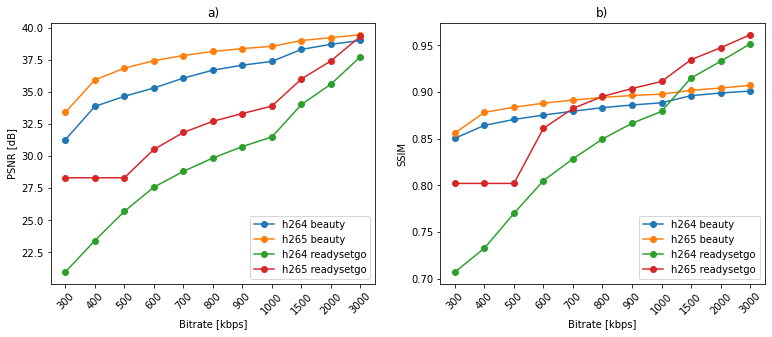

In [ ]:
_compare_quality(data)

In [ ]:
main(
    '/content/drive/MyDrive/YOLOv4/wideo/referencyjne/beauty_1920x1080_120fps_20s.yuv', 
    '/content/drive/MyDrive/YOLOv4/wideo/referencyjne/readysetgo_1920x1080_120fps_20s.yuv'
)

# **Bitrate**

In [ ]:
BITRATES = ['300k', '400k', '500k', '600k', '700k', '800k', '900k', '1000k', '1500k', '2000k', '3000k']
CODECS = 'libx264', 'libx265'

In [ ]:
from  matplotlib import pyplot as plt
import numpy as np

In [ ]:
beauty_h264 = [300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000]
beauty_h265 = [424, 371, 488, 583, 675, 770, 867, 963, 1464, 1964, 2984]
readysetgo_h264 = [357, 435, 587, 712, 787, 867, 966, 1071, 1592, 2117, 3165]
readysetgo_h265 = [642, 643, 643, 699, 755, 859, 956, 1055, 1568, 2078, 3101]

def _compare_bitrates():
    # X = np.arange(len(BITRATES))
    bitrates = [int(i[:-1]) for i in BITRATES]
    fig, (axb, axr) = plt.subplots(nrows=1, ncols=2, figsize=[12.8, 4.8])
    X_axis = np.arange(len(BITRATES))
    width = 0.25
    for i, (ax, (y1, y2)) in enumerate(zip(
        (axb, axr), (
            ((beauty_h264, 'beauty h264'), (beauty_h265, 'beauty h265')), 
            ((readysetgo_h264,'readysetgo h264'), \
             (readysetgo_h265, 'readysetgo h265'))
        ))):
        title = 'a)' if i == 0 else 'b)'
        ax.bar(X_axis - width, bitrates, width, \
               label = 'specified bitrate')
        ax.bar(X_axis, y1[0], width, label=y1[1])
        ax.bar(X_axis + width, y2[0], width, label=y2[1])
        ax.set_xlabel("No. of performed compression")
        ax.set_ylabel("Bitrate [kbps]")
        ax.set_title(title)
        ax.legend()
    plt.savefig(f'bitrate-comparison')
    plt.show()

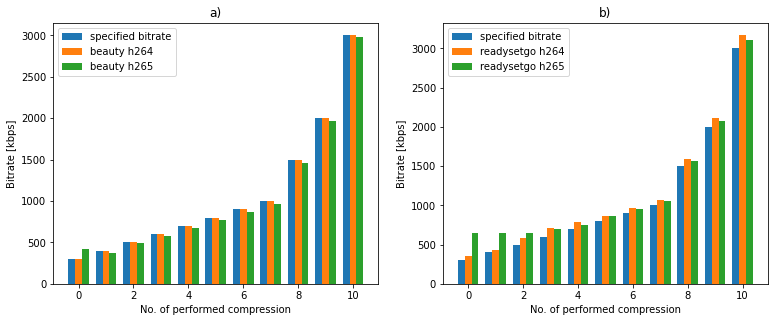

In [ ]:
_compare_bitrates()